In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')

%matplotlib inline

In [3]:
covid = pd.read_csv('data/covid_day_count.txt', sep=',')
covid

,확진일,일별 확진자 수
0,2020-01-24,1
1,2020-01-30,3
2,2020-01-31,3
3,2020-02-02,1
4,2020-02-05,2
...,...,...
555,2021-09-02,542
556,2021-09-03,566
557,2021-09-04,508
558,2021-09-05,464


In [4]:
traffic = pd.read_csv('data/traffic_202001_202107.txt', sep=',')
traffic

,일자,요일,총교통량
0,2020-01-01,수,7315694.0
1,2020-01-02,목,9251365.0
2,2020-01-03,금,9998638.0
3,2020-01-04,토,9128684.0
4,2020-01-05,일,7868358.0
...,...,...,...
573,2021-07-27,화,9073087.0
574,2021-07-28,수,8932580.0
575,2021-07-29,목,9030234.0
576,2021-07-30,금,9172571.0


In [5]:
covid_traffic = covid.merge(traffic, left_on='확진일', right_on='일자')
covid_traffic

,확진일,일별 확진자 수,일자,요일,총교통량
0,2020-01-24,1,2020-01-24,금,7747673.0
1,2020-01-30,3,2020-01-30,목,9930335.0
2,2020-01-31,3,2020-01-31,금,10107177.0
3,2020-02-02,1,2020-02-02,일,7302360.0
4,2020-02-05,2,2020-02-05,수,8531265.0
...,...,...,...,...,...
518,2021-07-27,573,2021-07-27,화,9073087.0
519,2021-07-28,514,2021-07-28,수,8932580.0
520,2021-07-29,488,2021-07-29,목,9030234.0
521,2021-07-30,475,2021-07-30,금,9172571.0


In [9]:
cov_tra = covid_traffic.drop(['일자'], axis=1)

In [10]:
cov_tra

,확진일,일별 확진자 수,요일,총교통량
0,2020-01-24,1,금,7747673.0
1,2020-01-30,3,목,9930335.0
2,2020-01-31,3,금,10107177.0
3,2020-02-02,1,일,7302360.0
4,2020-02-05,2,수,8531265.0
...,...,...,...,...
518,2021-07-27,573,화,9073087.0
519,2021-07-28,514,수,8932580.0
520,2021-07-29,488,목,9030234.0
521,2021-07-30,475,금,9172571.0


Text(0, 0.5, '서울시 교통량')

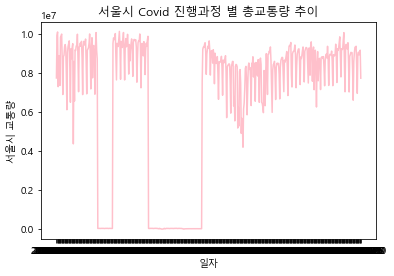

In [22]:
plt.plot(cov_tra['확진일'], cov_tra['총교통량'], color='pink')
plt.title('서울시 Covid 진행과정 별 총교통량 추이')
plt.xlabel('일자')
plt.ylabel('서울시 교통량')

## 의미없다

In [17]:
cov_num = cov_tra.sort_values(by='일별 확진자 수' ,ascending=True)
cov_num

,확진일,일별 확진자 수,요일,총교통량
0,2020-01-24,1,금,7747673.0
82,2020-05-17,1,일,28378.0
3,2020-02-02,1,일,7302360.0
71,2020-05-01,1,금,31485.0
70,2020-04-30,1,목,8727648.0
...,...,...,...,...
518,2021-07-27,573,화,9073087.0
497,2021-07-06,582,화,9472054.0
296,2020-12-17,588,목,8476613.0
511,2021-07-20,604,화,9033104.0


Text(0, 0.5, '서울시 교통량')

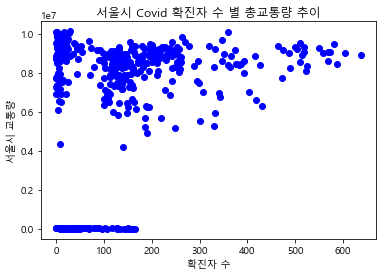

In [21]:
plt.scatter(cov_num['일별 확진자 수'], cov_num['총교통량'], color='blue')
plt.title('서울시 Covid 확진자 수 별 총교통량 추이')
plt.xlabel('확진자 수')
plt.ylabel('서울시 교통량')

## 역시 의미 없다